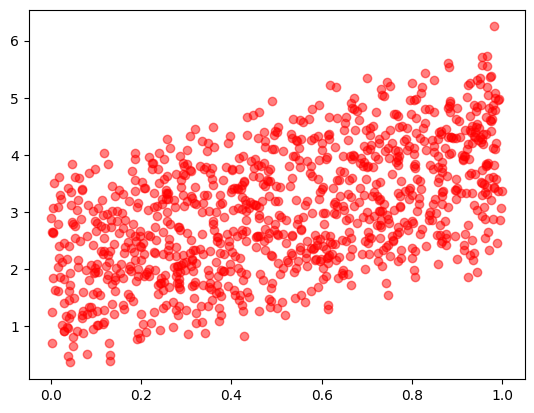

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define Regression
np.random.seed(0)
n_samples = 1000
X = np.random.uniform(size=(n_samples, 4)).astype(np.float32)
y = X[:, 0]*2 + X[:, 1]*3 + X[:, 2] + np.random.normal(scale=0.1, size=n_samples).astype(np.float32)

plt.scatter(X[:, 0], y, color= 'r', alpha= 0.5, label='Data')
plt.show()


In [2]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)

# Define quantiles
quantiles = 0.2

# Define quantile loss function
def quantile_loss(y_true, y_pred, quantiles):
    errors = y_true - y_pred
    quantile_loss = torch.mean(torch.max(quantiles * errors, (quantiles - 1) * errors))
    return quantile_loss

# Define the nn architecture
class QuantileRegressionModel(nn.Module):
    def __init__(self):
        super(QuantileRegressionModel, self).__init__()
        self.hidden_layer = nn.Linear(in_features = 4, out_features = 5)
        self.output_layer = nn.Linear(in_features = 5, out_features = 1)  # Output layer with 1 node
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

# Instantiate the model
model = QuantileRegressionModel()

# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 20

for epoch in range(epochs):
    epoch_loss = 0.0
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = quantile_loss(y_train_tensor, predictions, quantiles)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")


# Evaluate the model & testing loop
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = quantile_loss(y_test_tensor, predictions, quantiles)
    print("Test Loss:", test_loss.item())


Epoch 1/20, Loss: 0.6711
Epoch 2/20, Loss: 0.6670
Epoch 3/20, Loss: 0.6630
Epoch 4/20, Loss: 0.6590
Epoch 5/20, Loss: 0.6550
Epoch 6/20, Loss: 0.6510
Epoch 7/20, Loss: 0.6470
Epoch 8/20, Loss: 0.6429
Epoch 9/20, Loss: 0.6389
Epoch 10/20, Loss: 0.6349
Epoch 11/20, Loss: 0.6309
Epoch 12/20, Loss: 0.6269
Epoch 13/20, Loss: 0.6229
Epoch 14/20, Loss: 0.6188
Epoch 15/20, Loss: 0.6148
Epoch 16/20, Loss: 0.6108
Epoch 17/20, Loss: 0.6068
Epoch 18/20, Loss: 0.6028
Epoch 19/20, Loss: 0.5988
Epoch 20/20, Loss: 0.5947
Test Loss: 0.5930198431015015
